In [ ]:
import pandas as pd
import nltk
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
df = pd.read_excel('/content/BillBoard_Lyrics_FEB_22_02.xlsx')
df.head()

,Unnamed: 0,title,artist,id,year_released,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics
0,0,0,Please Don't Go,6dw6BquK0Mv72p6HpusqKN,1980.0,0.482,0.615,6,-11.093,1,0.0398,0.00888,0.000002,0.0431,0.437,96.307,230533,Please Don’t Go LyricsI love you\nYeah\n\nBabe...
1,1,1,Escape (The Pina Colada Song),5IMtdHjJ1OtkxbGe4zfUxQ,1980.0,0.836,0.509,0,-13.668,1,0.0548,0.46700,0.000004,0.0436,0.949,138.714,276493,Escape (The Piña Colada Song) Lyrics[Verse 1]\...
2,2,2,Rock With You,7oOOI85fVQvVnK5ynNMdW7,1980.0,0.808,0.535,1,-12.521,1,0.0353,0.17900,0.000099,0.1580,0.848,114.031,220627,"Rock with You Lyrics[Verse 1]\nGirl, close you..."
3,3,3,Send One Your Love,3GcHkmz4horYIEPYvdB0xF,1980.0,0.624,0.358,0,-17.456,0,0.0814,0.71500,0.000013,0.0862,0.418,72.841,242333,Send One Your Love Lyrics[Chorus 1]\nSend her ...
4,4,4,Do That To Me One More Time,0m4jVVZrsv0bLkAr1uM6UG,1980.0,0.728,0.524,7,-8.227,1,0.0255,0.56300,0.000131,0.0913,0.510,90.262,256667,Do That To Me One More Time Lyrics[Chorus]\nDo...


In [ ]:
del df['Unnamed: 0']
df.head()

,title,artist,id,year_released,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics
0,0,Please Don't Go,6dw6BquK0Mv72p6HpusqKN,1980.0,0.482,0.615,6,-11.093,1,0.0398,0.00888,0.000002,0.0431,0.437,96.307,230533,Please Don’t Go LyricsI love you\nYeah\n\nBabe...
1,1,Escape (The Pina Colada Song),5IMtdHjJ1OtkxbGe4zfUxQ,1980.0,0.836,0.509,0,-13.668,1,0.0548,0.46700,0.000004,0.0436,0.949,138.714,276493,Escape (The Piña Colada Song) Lyrics[Verse 1]\...
2,2,Rock With You,7oOOI85fVQvVnK5ynNMdW7,1980.0,0.808,0.535,1,-12.521,1,0.0353,0.17900,0.000099,0.1580,0.848,114.031,220627,"Rock with You Lyrics[Verse 1]\nGirl, close you..."
3,3,Send One Your Love,3GcHkmz4horYIEPYvdB0xF,1980.0,0.624,0.358,0,-17.456,0,0.0814,0.71500,0.000013,0.0862,0.418,72.841,242333,Send One Your Love Lyrics[Chorus 1]\nSend her ...
4,4,Do That To Me One More Time,0m4jVVZrsv0bLkAr1uM6UG,1980.0,0.728,0.524,7,-8.227,1,0.0255,0.56300,0.000131,0.0913,0.510,90.262,256667,Do That To Me One More Time Lyrics[Chorus]\nDo...


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stopwords=list(stopwords.words('english'))
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
lemmatizer = WordNetLemmatizer() 
# lemmatize string 
def lemmatize_word(text, output = 'as_string'): 
    word_tokens = word_tokenize(text) 
    # provide context i.e. part-of-speech 
    if output == 'as_list':
        lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    elif output == 'as_string':
        lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
        lemmas = ' '.join(lemmas)
    return lemmas 

In [ ]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_lyrics = []
# tqdm is for printing the status bar
for words in tqdm(df['lyrics'].values):
    lyrics = words

    #remove numbers
    lyrics = re.sub(r'\d+', '', lyrics)

    #removing anything between hard brackets, eg '[Interlude], '[Chorus]'
    lyrics = re.sub(pattern="\[.+?\]( )?", repl='', string=lyrics)

    #removing punctuation and joining blank if character is not in punctuation library
    punctuation = string.punctuation
    lyrics = ''.join([x for x in lyrics if x not in punctuation])

    lyrics = lyrics.replace('\\r', ' ')
    lyrics = lyrics.replace('\\"', ' ')
    lyrics = lyrics.replace('Lyrics', ' ')
    lyrics = lyrics.replace('LyricsI', ' ')
    #replacing "\n" from the start of lines with blank
    lyrics = re.sub(pattern='^\n', repl='', string=lyrics)
    lyrics = ' '.join(e for e in lyrics.split() if e.lower() not in stopwords)
    
    #making words lower case
    lyrics = lyrics.lower()
    preprocessed_lyrics.append(lyrics.strip())

df['lyrics_clean'] = preprocessed_lyrics

100%|██████████| 10047/10047 [00:14<00:00, 684.79it/s]


In [ ]:
df.head()

,title,artist,id,year_released,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics,lyrics_clean
0,0,Please Don't Go,6dw6BquK0Mv72p6HpusqKN,1980.0,0.482,0.615,6,-11.093,1,0.0398,0.00888,0.000002,0.0431,0.437,96.307,230533,Please Don’t Go LyricsI love you\nYeah\n\nBabe...,please don’t go love yeah babe love want know ...
1,1,Escape (The Pina Colada Song),5IMtdHjJ1OtkxbGe4zfUxQ,1980.0,0.836,0.509,0,-13.668,1,0.0548,0.46700,0.000004,0.0436,0.949,138.714,276493,Escape (The Piña Colada Song) Lyrics[Verse 1]\...,escape piña colada song tired lady wed togethe...
2,2,Rock With You,7oOOI85fVQvVnK5ynNMdW7,1980.0,0.808,0.535,1,-12.521,1,0.0353,0.17900,0.000099,0.1580,0.848,114.031,220627,"Rock with You Lyrics[Verse 1]\nGirl, close you...",rock girl close eyes let rhythm get dont try f...
3,3,Send One Your Love,3GcHkmz4horYIEPYvdB0xF,1980.0,0.624,0.358,0,-17.456,0,0.0814,0.71500,0.000013,0.0862,0.418,72.841,242333,Send One Your Love Lyrics[Chorus 1]\nSend her ...,send one love send love dozen roses make sure ...
4,4,Do That To Me One More Time,0m4jVVZrsv0bLkAr1uM6UG,1980.0,0.728,0.524,7,-8.227,1,0.0255,0.56300,0.000131,0.0913,0.510,90.262,256667,Do That To Me One More Time Lyrics[Chorus]\nDo...,one time one time never enough man like one ti...


In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df['lyrics_lem'] = df['lyrics_clean'].apply(lemmatize_word)

In [ ]:
df.head()

,title,artist,id,year_released,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics,lyrics_clean,lyrics_lem
0,0,Please Don't Go,6dw6BquK0Mv72p6HpusqKN,1980.0,0.482,0.615,6,-11.093,1,0.0398,0.00888,0.000002,0.0431,0.437,96.307,230533,Please Don’t Go LyricsI love you\nYeah\n\nBabe...,please don’t go love yeah babe love want know ...,please don ’ t go love yeah babe love want kno...
1,1,Escape (The Pina Colada Song),5IMtdHjJ1OtkxbGe4zfUxQ,1980.0,0.836,0.509,0,-13.668,1,0.0548,0.46700,0.000004,0.0436,0.949,138.714,276493,Escape (The Piña Colada Song) Lyrics[Verse 1]\...,escape piña colada song tired lady wed togethe...,escape piña colada song tire lady wed together...
2,2,Rock With You,7oOOI85fVQvVnK5ynNMdW7,1980.0,0.808,0.535,1,-12.521,1,0.0353,0.17900,0.000099,0.1580,0.848,114.031,220627,"Rock with You Lyrics[Verse 1]\nGirl, close you...",rock girl close eyes let rhythm get dont try f...,rock girl close eye let rhythm get dont try fi...
3,3,Send One Your Love,3GcHkmz4horYIEPYvdB0xF,1980.0,0.624,0.358,0,-17.456,0,0.0814,0.71500,0.000013,0.0862,0.418,72.841,242333,Send One Your Love Lyrics[Chorus 1]\nSend her ...,send one love send love dozen roses make sure ...,send one love send love dozen roses make sure ...
4,4,Do That To Me One More Time,0m4jVVZrsv0bLkAr1uM6UG,1980.0,0.728,0.524,7,-8.227,1,0.0255,0.56300,0.000131,0.0913,0.510,90.262,256667,Do That To Me One More Time Lyrics[Chorus]\nDo...,one time one time never enough man like one ti...,one time one time never enough man like one ti...


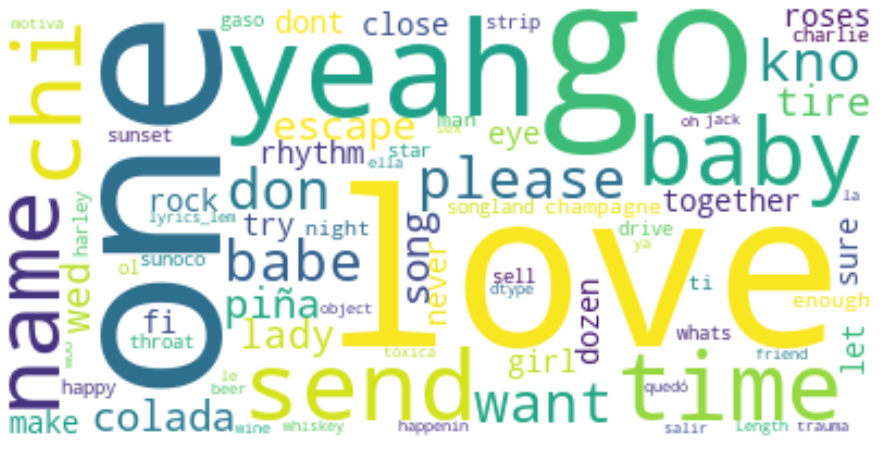

In [ ]:
wordcloud = WordCloud(max_font_size=100, background_color="white").generate(str(df.lyrics_lem))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Sentiment Analysis

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()

In [ ]:
polarity_score_dict = {
    "neg" : 0.0,
    "neu" : 0.0,
    "pos" : 0.0,
    "compound": 0.0
}
positive_song_ctr = 0
negative_song_ctr = 0
for song in df['lyrics_lem']:
    #accumulate the total sum for all sentiment categories
    polarity = SIA.polarity_scores(song)
    polarity_score_dict["neg"] += polarity["neg"]
    polarity_score_dict["neu"] += polarity["neu"]
    polarity_score_dict["pos"] += polarity["pos"]
    polarity_score_dict["compound"] += polarity["compound"]

    # count how many songs are positive and negative in the corpus
    if polarity["compound"] >= 0:
        positive_song_ctr += 1
    else:
        negative_song_ctr += 1

In [ ]:
print("There are", positive_song_ctr, "positive songs from the corpus")
print("There are", negative_song_ctr, "negative songs from the corpus")

There are 7484 positive songs from the corpus
There are 2563 negative songs from the corpus


In [ ]:
print(polarity_score_dict)

{'neg': 1234.7200000000037, 'neu': 6441.7819999999965, 'pos': 2370.479999999999, 'compound': 4699.739899999993}


# Emotion Detection

In [ ]:
!pip install NRCLex

In [ ]:
from nrclex import NRCLex

In [ ]:
#applying NRC lex to the cleaned lyrics
df['Lyric_Emotion'] = df['lyrics_lem'].apply(lambda x: NRCLex(x).affect_frequencies)
df.head()

,title,artist,id,year_released,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics,lyrics_clean,lyrics_lem,Lyric_Emotion
0,0,Please Don't Go,6dw6BquK0Mv72p6HpusqKN,1980.0,0.482,0.615,6,-11.093,1,0.0398,0.00888,0.000002,0.0431,0.437,96.307,230533,Please Don’t Go LyricsI love you\nYeah\n\nBabe...,please don’t go love yeah babe love want know ...,please don ’ t go love yeah babe love want kno...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
1,1,Escape (The Pina Colada Song),5IMtdHjJ1OtkxbGe4zfUxQ,1980.0,0.836,0.509,0,-13.668,1,0.0548,0.46700,0.000004,0.0436,0.949,138.714,276493,Escape (The Piña Colada Song) Lyrics[Verse 1]\...,escape piña colada song tired lady wed togethe...,escape piña colada song tire lady wed together...,"{'fear': 0.06976744186046512, 'anger': 0.01162..."
2,2,Rock With You,7oOOI85fVQvVnK5ynNMdW7,1980.0,0.808,0.535,1,-12.521,1,0.0353,0.17900,0.000099,0.1580,0.848,114.031,220627,"Rock with You Lyrics[Verse 1]\nGirl, close you...",rock girl close eyes let rhythm get dont try f...,rock girl close eye let rhythm get dont try fi...,"{'fear': 0.14444444444444443, 'anger': 0.01111..."
3,3,Send One Your Love,3GcHkmz4horYIEPYvdB0xF,1980.0,0.624,0.358,0,-17.456,0,0.0814,0.71500,0.000013,0.0862,0.418,72.841,242333,Send One Your Love Lyrics[Chorus 1]\nSend her ...,send one love send love dozen roses make sure ...,send one love send love dozen roses make sure ...,"{'fear': 0.04, 'anger': 0.0, 'anticip': 0.0, '..."
4,4,Do That To Me One More Time,0m4jVVZrsv0bLkAr1uM6UG,1980.0,0.728,0.524,7,-8.227,1,0.0255,0.56300,0.000131,0.0913,0.510,90.262,256667,Do That To Me One More Time Lyrics[Chorus]\nDo...,one time one time never enough man like one ti...,one time one time never enough man like one ti...,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."


In [ ]:
#adding the emotion and sentiment dictionary as columns in the dataframe
df = pd.concat([df.drop(['Lyric_Emotion'], axis = 1), df['Lyric_Emotion'].apply(pd.Series)], axis = 1)
df.head()

,title,artist,id,year_released,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics,lyrics_clean,lyrics_lem,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
0,0,Please Don't Go,6dw6BquK0Mv72p6HpusqKN,1980.0,0.482,0.615,6,-11.093,1,0.0398,0.00888,0.000002,0.0431,0.437,96.307,230533,Please Don’t Go LyricsI love you\nYeah\n\nBabe...,please don’t go love yeah babe love want know ...,please don ’ t go love yeah babe love want kno...,0.000000,0.000000,0.0,0.086957,0.086957,0.304348,0.108696,0.108696,0.000000,0.282609,0.021739
1,1,Escape (The Pina Colada Song),5IMtdHjJ1OtkxbGe4zfUxQ,1980.0,0.836,0.509,0,-13.668,1,0.0548,0.46700,0.000004,0.0436,0.949,138.714,276493,Escape (The Piña Colada Song) Lyrics[Verse 1]\...,escape piña colada song tired lady wed togethe...,escape piña colada song tire lady wed together...,0.069767,0.011628,0.0,0.116279,0.093023,0.209302,0.151163,0.046512,0.011628,0.139535,0.151163
2,2,Rock With You,7oOOI85fVQvVnK5ynNMdW7,1980.0,0.808,0.535,1,-12.521,1,0.0353,0.17900,0.000099,0.1580,0.848,114.031,220627,"Rock with You Lyrics[Verse 1]\nGirl, close you...",rock girl close eyes let rhythm get dont try f...,rock girl close eye let rhythm get dont try fi...,0.144444,0.011111,0.0,0.066667,0.000000,0.366667,0.144444,0.133333,0.000000,0.111111,0.022222
3,3,Send One Your Love,3GcHkmz4horYIEPYvdB0xF,1980.0,0.624,0.358,0,-17.456,0,0.0814,0.71500,0.000013,0.0862,0.418,72.841,242333,Send One Your Love Lyrics[Chorus 1]\nSend her ...,send one love send love dozen roses make sure ...,send one love send love dozen roses make sure ...,0.040000,0.000000,0.0,0.120000,0.040000,0.320000,0.080000,0.040000,0.000000,0.260000,0.100000
4,4,Do That To Me One More Time,0m4jVVZrsv0bLkAr1uM6UG,1980.0,0.728,0.524,7,-8.227,1,0.0255,0.56300,0.000131,0.0913,0.510,90.262,256667,Do That To Me One More Time Lyrics[Chorus]\nDo...,one time one time never enough man like one ti...,one time one time never enough man like one ti...,0.000000,0.000000,0.0,0.030303,0.060606,0.242424,0.000000,0.000000,0.000000,0.212121,0.454545


In [ ]:
# Finding the max value from the emotion columns and appending it to new 'Overall_Emotion' column
df['Overall_Emotion'] = df[['fear', 'anger', 'anticipation', 'trust', 'surprise', 'sadness', 'disgust', 'joy']].idxmax(axis=1)

In [ ]:
df.head()

,title,artist,id,year_released,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,lyrics,lyrics_clean,lyrics_lem,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation,Overall_Emotion
0,0,Please Don't Go,6dw6BquK0Mv72p6HpusqKN,1980.0,0.482,0.615,6,-11.093,1,0.0398,0.00888,0.000002,0.0431,0.437,96.307,230533,Please Don’t Go LyricsI love you\nYeah\n\nBabe...,please don’t go love yeah babe love want know ...,please don ’ t go love yeah babe love want kno...,0.000000,0.000000,0.0,0.086957,0.086957,0.304348,0.108696,0.108696,0.000000,0.282609,0.021739,joy
1,1,Escape (The Pina Colada Song),5IMtdHjJ1OtkxbGe4zfUxQ,1980.0,0.836,0.509,0,-13.668,1,0.0548,0.46700,0.000004,0.0436,0.949,138.714,276493,Escape (The Piña Colada Song) Lyrics[Verse 1]\...,escape piña colada song tired lady wed togethe...,escape piña colada song tire lady wed together...,0.069767,0.011628,0.0,0.116279,0.093023,0.209302,0.151163,0.046512,0.011628,0.139535,0.151163,anticipation
2,2,Rock With You,7oOOI85fVQvVnK5ynNMdW7,1980.0,0.808,0.535,1,-12.521,1,0.0353,0.17900,0.000099,0.1580,0.848,114.031,220627,"Rock with You Lyrics[Verse 1]\nGirl, close you...",rock girl close eyes let rhythm get dont try f...,rock girl close eye let rhythm get dont try fi...,0.144444,0.011111,0.0,0.066667,0.000000,0.366667,0.144444,0.133333,0.000000,0.111111,0.022222,fear
3,3,Send One Your Love,3GcHkmz4horYIEPYvdB0xF,1980.0,0.624,0.358,0,-17.456,0,0.0814,0.71500,0.000013,0.0862,0.418,72.841,242333,Send One Your Love Lyrics[Chorus 1]\nSend her ...,send one love send love dozen roses make sure ...,send one love send love dozen roses make sure ...,0.040000,0.000000,0.0,0.120000,0.040000,0.320000,0.080000,0.040000,0.000000,0.260000,0.100000,joy
4,4,Do That To Me One More Time,0m4jVVZrsv0bLkAr1uM6UG,1980.0,0.728,0.524,7,-8.227,1,0.0255,0.56300,0.000131,0.0913,0.510,90.262,256667,Do That To Me One More Time Lyrics[Chorus]\nDo...,one time one time never enough man like one ti...,one time one time never enough man like one ti...,0.000000,0.000000,0.0,0.030303,0.060606,0.242424,0.000000,0.000000,0.000000,0.212121,0.454545,anticipation


In [ ]:
#creating function to make plotting emotions easier
def lyric_emotion(text):
    #word = [word for word in word if word not in stopwords.words('english')]
    lyrics = str([cell.encode('utf-8') for cell in text])# to convert the text into utf-8 unicode
    str_text = NRCLex(lyrics) 
    str_text = str_text.raw_emotion_scores
    str_text = pd.DataFrame(str_text,index=[0])
    str_text = pd.melt(str_text)
    str_text.columns = ('Emotions','Count')
    str_text = str_text.sort_values('Count')
    return str_text

In [ ]:
overall_emotion = lyric_emotion(df.lyrics_lem)

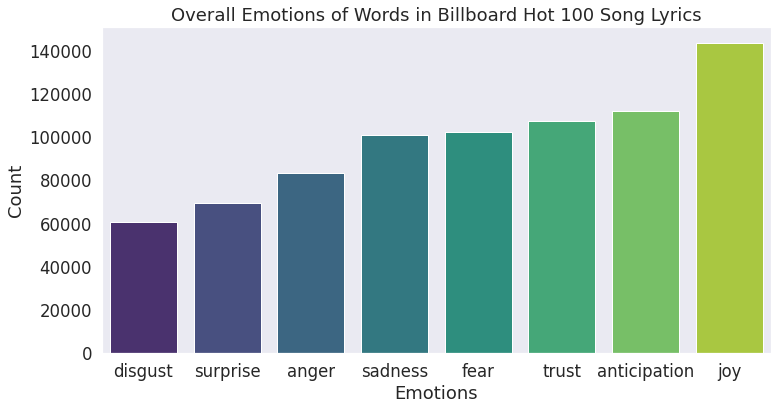

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Overall Emotions of Words in Billboard Hot 100 Song Lyrics')
sns.set_style('dark')
sns.set_context(context='notebook',font_scale=1.5)
sns.barplot(x='Emotions',y='Count',data = overall_emotion[0:8],palette='viridis');

In [ ]:
df.to_csv('Lyric_AudioFeatures_Emotions_23_02.csv', header = True)